In [ ]:
# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Datasets

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


In [4]:
print("Customers Dataset Overview:")
print(customers.head(), "\n")  # First 5 rows

Customers Dataset Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [5]:
print("Summary of Customers Dataset:")
print(customers.info(), "\n")  # Data types and non-null values

Summary of Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 



In [6]:
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n") #Count missing values

Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 



In [7]:
print("Products Dataset Overview:")
print(products.head(), "\n")

Products Dataset Overview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [8]:
print("Summary of Products Dataset:")
print(products.info(), "\n")

Summary of Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 



In [9]:
print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 



In [10]:
# Explore Transactions.csv
print("Transactions Dataset Overview:")
print(transactions.head(), "\n")

Transactions Dataset Overview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68   



In [11]:
print("Summary of Transactions Dataset:")
print(transactions.info(), "\n")

Summary of Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None 



In [12]:
print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [13]:
print("Duplicate rows in Customers Dataset:", customers.duplicated().sum())

Duplicate rows in Customers Dataset: 0


In [14]:
print("Duplicate rows in Products Dataset:", products.duplicated().sum())

Duplicate rows in Products Dataset: 0


In [15]:
print("Duplicate rows in Transactions Dataset:", transactions.duplicated().sum())

Duplicate rows in Transactions Dataset: 0


In [16]:
# Merge the data

In [17]:
merged = transactions.merge(customers, on='CustomerID', how='left')

In [18]:
merged = merged.merge(products, on='ProductID', how='left')

In [19]:
# EDA

In [20]:
merged.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [23]:
print("Total Revenue:", merged['TotalValue'].sum())

Total Revenue: 689995.56


In [22]:
print("Average Transaction Size:", merged['TotalValue'].mean())

Average Transaction Size: 689.9955600000001


In [25]:
# Insight 01: Top-selling products drive revenue
# Goal: Identify the top-selling products and their contribution to total revenue.

In [52]:
top_products = merged.groupby('ProductName').agg(
    TotalRevenue=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).sort_values(by='TotalRevenue', ascending=False)

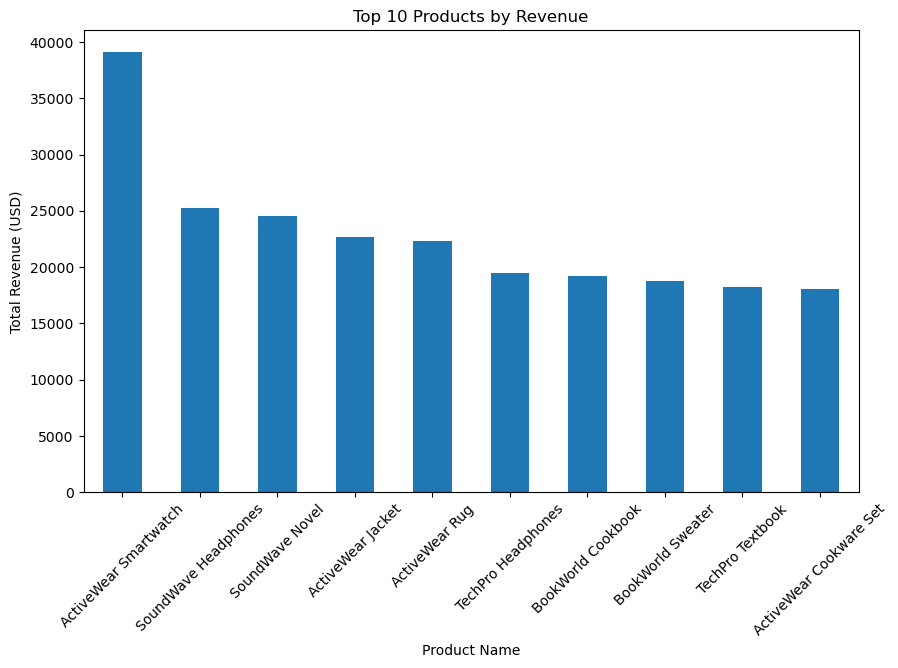

In [53]:
top_10_products = top_products.head(10)
top_10_products['TotalRevenue'].plot(kind='bar', figsize=(10, 6), title='Top 10 Products by Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

In [55]:
total_revenue = top_products['TotalRevenue'].sum()
top_product_revenue = top_products.iloc[0]['TotalRevenue']
top_product_name = top_products.index[0]
print(f"{top_product_name} contributes {top_product_revenue / total_revenue * 100:.2f}% of total revenue.")

ActiveWear Smartwatch contributes 5.67% of total revenue.


In [30]:
# Insight 2: High-revenue regions
# Goal: Analyze sales by region to identify the most profitable regions.

In [31]:
sales_by_region = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

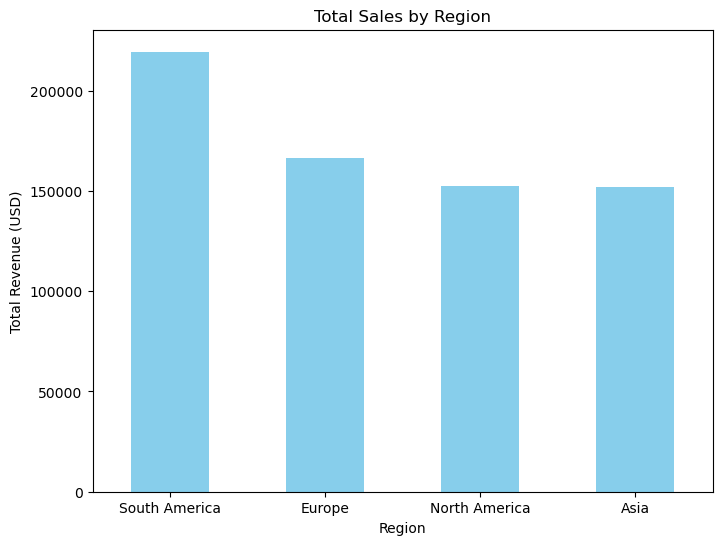

In [32]:
sales_by_region.plot(kind='bar', figsize=(8, 6), title='Total Sales by Region', color='skyblue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

In [33]:
top_region = sales_by_region.idxmax()
top_region_revenue = sales_by_region.max()
print(f"The South America region contributes the highest revenue with ${top_region_revenue:.2f}.")

The South America region contributes the highest revenue with $219352.56.


In [34]:
# Insight 3: Customer engagement (repeat purchases)
# Goal: Analyze repeat purchase behaviour among customers.

In [35]:
customer_purchases = merged.groupby('CustomerID')['TransactionID'].nunique()

In [37]:
customer_purchases

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Name: TransactionID, Length: 199, dtype: int64

In [39]:
customer_categories = pd.cut(
    customer_purchases,
    bins=[0, 1, 5, 10, float('inf')],  # Define bin edges
    labels=['1 Purchase', '2-5 Purchases', '6-10 Purchases', '>10 Purchases']  # Define category labels
)

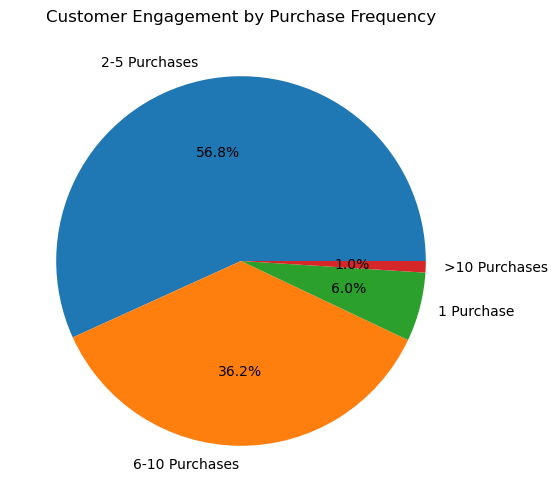

In [41]:
customer_categories.value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8, 6), 
    title='Customer Engagement by Purchase Frequency'
)
plt.ylabel('')
plt.show()

In [42]:
high_engagement = customer_purchases[customer_purchases > 5].count() / customer_purchases.count() * 100
print(f"{high_engagement:.2f}% of customers made more than 5 purchases.")

37.19% of customers made more than 5 purchases.


In [43]:
# Insight 4: Seasonality in signups
# Goal: Analyze signup trends to identify seasonal patterns.

In [44]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')

In [45]:
signup_trends = customers.groupby('SignupMonth').size()

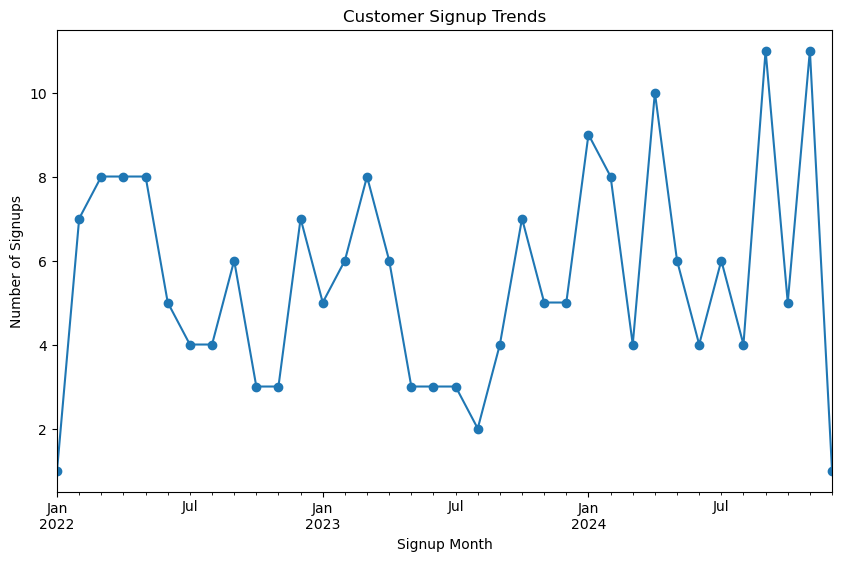

In [46]:
signup_trends.plot(kind='line', figsize=(10, 6), marker='o', title='Customer Signup Trends')
plt.ylabel('Number of Signups')
plt.xlabel('Signup Month')
plt.show()

In [47]:
peak_month = signup_trends.idxmax()
print(f"The peak signup month is {peak_month}.")

The peak signup month is 2024-09.


In [48]:
# Insight 5: Underperforming categories
# Goal: Identify categories contributing less to total revenue.

In [49]:
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=True)

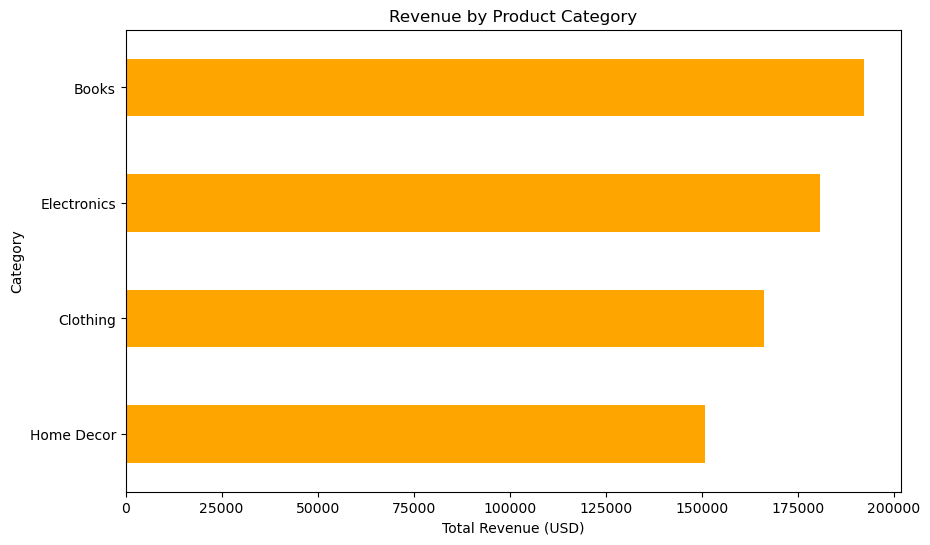

In [50]:
category_revenue.plot(kind='barh', figsize=(10, 6), color='orange', title='Revenue by Product Category')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Category')
plt.show()

In [51]:
least_category = category_revenue.idxmin()
print(f"The category with the lowest revenue is {least_category}, contributing only ${category_revenue.min():.2f}.")

The category with the lowest revenue is Home Decor, contributing only $150893.93.


In [56]:
# Top 5 Business Insights from EDA:

# Insight 01: ActiveWear Smartwatch contributes 5.67% of total revenue.
# Insight 02: The South America region contributes the highest revenue with $219352.56.
# Insight 03: 37.19% of customers made more than 5 purchases.
# Insight 04: The peak signup month is 2024-09(September, 2024).
# Insight 05: The category with the lowest revenue is Home Decor, contributing only $150893.93.